In [1]:
import numpy as np
from pytt.training.tracker import Tracker
import matplotlib.pyplot as plt
tracker = Tracker.load('checkpoints/ehr_extraction_code_supervision/checkpoint5/tracker.pkl')

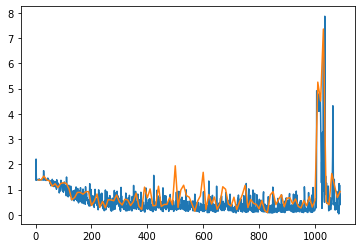

In [2]:
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history], [iterinfo.train_info.batch_info_dict['loss']/iterinfo.train_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history])
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history if iterinfo.val_info is not None], [iterinfo.val_info.batch_info_dict['loss']/iterinfo.val_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history if iterinfo.val_info is not None])
# plt.axis([0,3000,0,1])

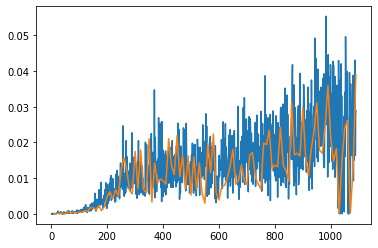

In [3]:
from models.evidence_inference.iteration_info import precision_recall_f1
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history], [
    precision_recall_f1(iterinfo.train_info.batch_info_dict['true_positives'],
                        iterinfo.train_info.batch_info_dict['positives'],
                        iterinfo.train_info.batch_info_dict['relevants'])[2] for iterinfo in tracker.history])
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history if iterinfo.val_info is not None], [
    precision_recall_f1(iterinfo.val_info.batch_info_dict['true_positives'],
                        iterinfo.val_info.batch_info_dict['positives'],
                        iterinfo.val_info.batch_info_dict['relevants'])[2] for iterinfo in tracker.history if iterinfo.val_info is not None])


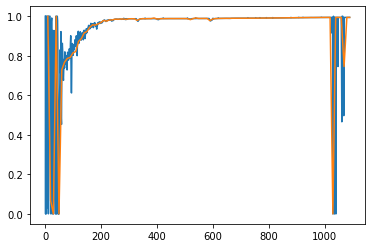

In [4]:
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history], [iterinfo.train_info.batch_info_dict['accuracy_sum']/iterinfo.train_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history])
plt.plot([iterinfo.iterator_info.batches_seen for iterinfo in tracker.history if iterinfo.val_info is not None], [iterinfo.val_info.batch_info_dict['accuracy_sum']/iterinfo.val_info.batch_info_dict['_batch_length'] for iterinfo in tracker.history if iterinfo.val_info is not None])
